https://pypi.python.org/pypi/windrose/

https://github.com/python-windrose/windrose

http://nbviewer.jupyter.org/github/python-windrose/windrose/blob/master/windrose_sample_random.ipynb

In [1]:
import sys
sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/')
sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/weather_mast/')

import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import createFolder as cF
import pandas as pd
import get_Haukeli_obs_data as obsDat

import calc_date as cd
import save_fig as sF

from windrose_edit import WindroseAxes
import matplotlib as mpl
mpl.style.use('ggplot')

In [2]:
year = 2016
month = 12
tid = '00'
station = 'Haukeliseter'
savefig = 0# 1 = yes, 0 = no



In [3]:
#### days 
t = ['17', '18','19', '20', '21', '22', '23', '24', '25', '26', '27']
#t = ['26']

In [4]:
figdir = '../../Figures/Windrose/%s/weather_mast' %(station)
# Folder where the figures are being saved    
cF.createFolder('%s/' %(figdir))
form = 'png'

In [5]:
### Haukeli obs.
txtdir = '../../Data/eklima/'
txt_filename = 'Observations-hour_minutes.txt'



In [6]:
# read in the Haukeliseter observation file, sorted by daily values
Haukeli = pd.read_csv('%s/%s' %(txtdir, txt_filename),\
                    sep = ';',header=19, skipfooter = 11, engine= 'python')

DateHour = Haukeli['Date-Hour(UTC)']

DD   = Haukeli['DD'].astype(float)             # Wind direction (FF); [degrees]
FF   = Haukeli['FF'].astype(float)             # Wind speed (10 meters above ground);m/s




In [7]:
idxFF = np.where(FF[:] == -9999)
idxDD = np.where(DD[:] == -9999)

FF[idxFF[0][:]] = np.nan
DD[idxDD[0][:]] = np.nan


In [8]:
ws, wd, dt_wind, hour_wind, day_wind, month_wind, year_wind = obsDat.valid_values_wind(FF, DD, DateHour)

In [9]:
champ = 255.
date_blue = np.array([1,74,159])/255.
no1 = np.array([79,94,26])/champ
no2 = np.array([131,156,45])/champ
no3 = np.array([71,153,112])/champ
no4 = np.array([77,111,157])/champ
no5 = np.array([157,58,55])/champ
no6 = np.array([211,120,50])/champ
no7 = np.array([218,181,70])/champ

In [10]:
np.max(ws[20:26])

19.199999999999999

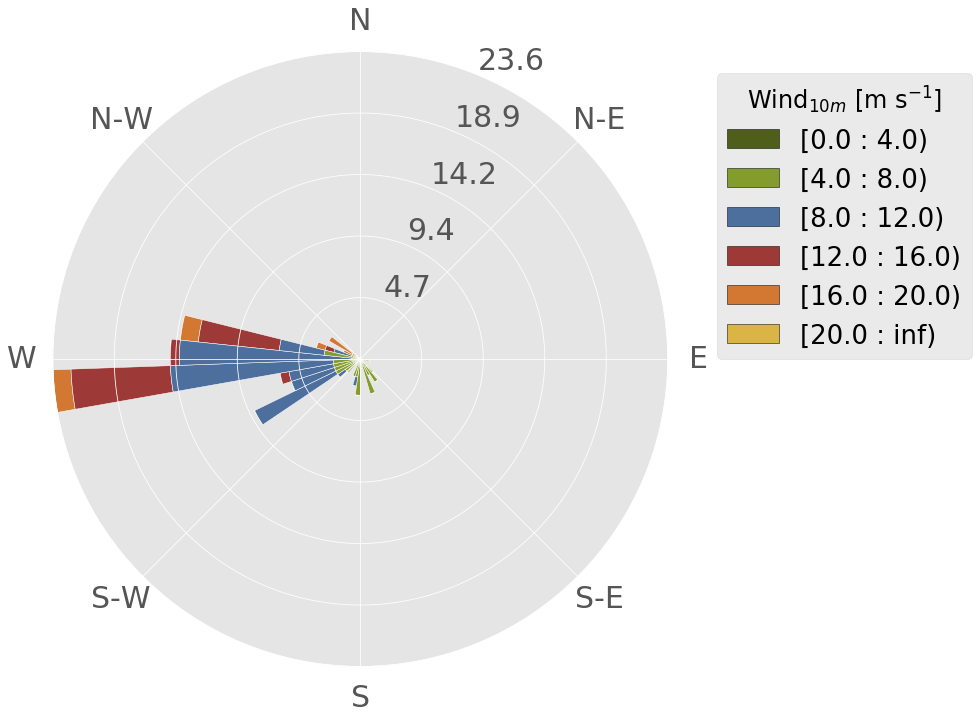

In [11]:
#### plot figure
figname = '20161221_26.%s' %(form)
    
levels = np.arange(0,24,4)
cmap = mpl.colors.ListedColormap([no1, no2, #no3, 
                                  no4, no5, no6, no7])
norm = mpl.colors.BoundaryNorm(boundaries = levels, ncolors=cmap.N)
plt.hist([0,1])
plt.close()
    
fig = plt.figure(figsize=(12,10))
ax0 = fig.add_subplot(111, projection='windrose')
ax0.bar(np.ndarray.flatten(np.asarray(wd[20:26])), 
        np.ndarray.flatten(np.asarray(ws[20:26])), normed=True, opening=1.0, edgecolor='white',nsector=45, 
                 cmap=cmap,bins=np.arange(0, 24, 4))
ax0._info['bins']
ax0.set_legend()
lgd = ax0.legend(title ='Wind$_{10m}$ [m s$^{-1}$]',fontsize=26)
ax0.get_legend().get_title().set_fontsize('24')
ax0.tick_params(labelsize = 30)

#ax0.set_title('%s, %s %s %s' %(calday,day_wind[int(day)-1][0],calmon,year_wind[int(day)-1][0]), color = date_blue,fontsize = 20, y=1.08)
plt.tight_layout()
    
if savefig == 1:
    plt.savefig('%s/%s' % (figdir, figname), format = form,bbox_extra_artists=(lgd,), bbox_inches='tight')
  #  sF.save_figure_portrait(figdir,figname,form)
    print('saved: %s/%s' %(figdir,figname) )
else:
    plt.show()
plt.close()

TypeError: object of type 'numpy.float64' has no len()

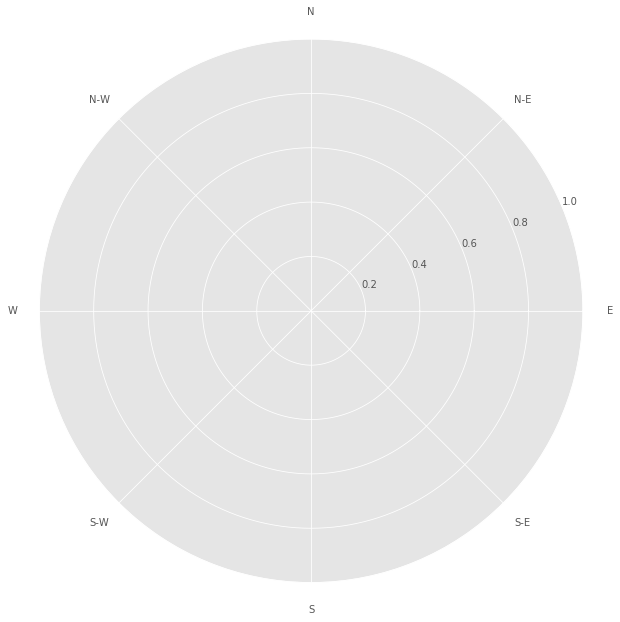

In [13]:
t = ['23']
for day in t:
    calday, calmon = cd.get_dayname(year_wind[int(day)-1][0], month_wind[int(day)-1][0], day_wind[int(day)-1][0])
    #### plot figure
    figname = '%s%s%s.%s' %(year,month,day,form)
    
    levels = np.arange(0,28,4)
    cmap = mpl.colors.ListedColormap([no1, no2, no3, no4, no5, no6, no7])
    norm = mpl.colors.BoundaryNorm(boundaries = levels, ncolors=cmap.N)
    plt.hist([0,1])
    plt.close()
    
    fig = plt.figure(figsize=(12,10))
    ax0 = fig.add_subplot(111, projection='windrose')
    ax0.bar(wd[int(day)-1][:], ws[int(day)-1][:], normed=True, opening=1.0, edgecolor='white',nsector=45, 
                 cmap=cmap,bins=np.arange(0, 28, 4))
    ax0._info['bins']
    ax0.set_legend()
    ax0.legend(title ='Wind$_{10m}$ [m s$^{-1}$]',fontsize=14)
    ax0.get_legend().get_title().set_fontsize('18')
    ax0.tick_params(labelsize = 20)
    ax0.set_title('%s, %s %s %s' %(calday,day_wind[int(day)-1][0],calmon,year_wind[int(day)-1][0]), color = date_blue,fontsize = 20, y=1.08)

    
    if savefig == 1:
        sF.save_figure_portrait(figdir,figname,form)
        print('saved: %s/%s' %(figdir,figname) )
    else:
        plt.show()
    plt.close()
    
 